In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D
from tensorflow.keras.layers import MaxPool2D,Flatten,Dense
from tensorflow.keras import Model

![](https://lh3.googleusercontent.com/-WuPVxynI_ss/X_6DG-R179I/AAAAAAAAsSc/S0rVDJtOW_Q7bbPdOC2xnvRn3DpRbbe6wCK8BGAsYHg/s0/2021-01-12.png)

In [3]:
input=Input(shape=(224,224,3)) ## Input is a RGB image so 3 channel

## Conv Block-1

In [7]:
x=Conv2D(filters=128,kernel_size=3,padding='same',activation='relu')(input)
x=Conv2D(filters=128,kernel_size=3,padding='same',activation='relu')(x)
x=MaxPool2D(pool_size=2,strides=2,padding='same')(x)


## Conv Block-2

In [13]:
x=Conv2D(filters=128,kernel_size=3,padding='same',activation='relu')(x)
x=Conv2D(filters=128,kernel_size=3,padding='same',activation='relu')(x)
x=MaxPool2D(pool_size=2,strides=2,padding='same')(x)

### Conv Block-3

In [14]:
x=Conv2D(filters=256,kernel_size=3,padding='same',activation='relu')(x)
x=Conv2D(filters=256,kernel_size=3,padding='same',activation='relu')(x)
x=Conv2D(filters=256,kernel_size=3,padding='same',activation='relu')(x)
x=MaxPool2D(pool_size=2,strides=2,padding='same')(x)

## Conv Block-4

In [15]:
x=Conv2D(filters=512,kernel_size=3,padding='same',activation='relu')(x)
x=Conv2D(filters=512,kernel_size=3,padding='same',activation='relu')(x)
x=Conv2D(filters=512,kernel_size=3,padding='same',activation='relu')(x)
x=MaxPool2D(pool_size=2,strides=2,padding='same')(x)

## Conv Block-5

In [16]:
x=Conv2D(filters=512,kernel_size=3,padding='same',activation='relu')(x)
x=Conv2D(filters=512,kernel_size=3,padding='same',activation='relu')(x)
x=Conv2D(filters=512,kernel_size=3,padding='same',activation='relu')(x)
x=MaxPool2D(pool_size=2,strides=2,padding='same')(x)

In [22]:
x=Flatten()(x)
x=Dense(units=4096,activation='relu')(x)
x=Dense(units=4096,activation='relu')(x)
output=Dense(units=1000,activation='softmax')(x)

In [27]:
model=Model(inputs=input,outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 128)     3584      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 128)     147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0   

### Keras pretrined weights

In [28]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16  import VGG16
import numpy as np
import cv2

In [29]:
model=VGG16(weights='imagenet',include_top=True)
model.compile(optimizer='sgd',loss='categorical_crossentropy')

553467904/553467096 [==============================] - 69s 0us/step


In [32]:
im= cv2.resize( cv2.imread('/home/hemanth/Documents/DeepLearning/CNN/2021-01-12.jpeg'),(224,224))
im=np.expand_dims(im,axis=0)
im.astype(np.float32)

array([[[[169., 158., 156.],
         [173., 159., 152.],
         [177., 155., 150.],
         ...,
         [157., 137., 120.],
         [157., 137., 120.],
         [159., 139., 122.]],

        [[170., 158., 154.],
         [195., 180., 173.],
         [184., 165., 158.],
         ...,
         [158., 133., 118.],
         [161., 136., 120.],
         [156., 132., 116.]],

        [[170., 158., 150.],
         [159., 145., 135.],
         [172., 153., 146.],
         ...,
         [160., 135., 120.],
         [155., 130., 114.],
         [159., 135., 119.]],

        ...,

        [[ 88.,  96., 104.],
         [ 50.,  59.,  65.],
         [ 37.,  41.,  47.],
         ...,
         [133., 126., 133.],
         [169., 162., 169.],
         [162., 154., 161.]],

        [[ 13.,  15.,  23.],
         [ 22.,  21.,  28.],
         [  5.,   5.,  10.],
         ...,
         [159., 153., 158.],
         [163., 157., 162.],
         [155., 149., 153.]],

        [[105., 105., 117.],
       

In [33]:
out=model.predict(im)
index=np.argmax(out)
print(index)

820


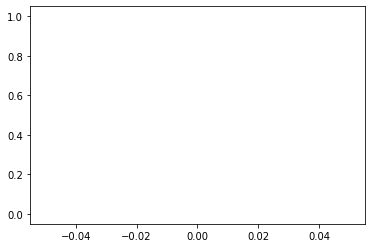

In [38]:
plt.plot(out)
plt.show()

## feature Extraction in VGG16

In [40]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import models
base_model=VGG16(weights='imagenet',include_top=True)
print(base_model)
for i, layer in enumerate(base_model.layers):
    print(i,layer.name,layer.output_shape)

0 input_3 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [41]:
model=models.Model(inputs=base_model.input,
                  outputs=base_model.get_layer('block1_pool').output)


In [44]:
imge_path='/home/hemanth/Documents/DeepLearning/CNN/cats_and_dogs_filtered/train/cats/cat.0.jpg'
img=image.load_img(imge_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [45]:
x

array([[[[ -16.939003 ,   47.221    ,   79.32     ],
         [ -13.939003 ,   50.221    ,   82.32     ],
         [ -10.939003 ,   53.221    ,   85.32     ],
         ...,
         [  15.060997 ,   86.221    ,  121.32     ],
         [  19.060997 ,   85.221    ,  117.32     ],
         [  17.060997 ,   83.221    ,  115.32     ]],

        [[ -16.939003 ,   47.221    ,   79.32     ],
         [ -13.939003 ,   50.221    ,   82.32     ],
         [ -10.939003 ,   53.221    ,   85.32     ],
         ...,
         [  16.060997 ,   88.221    ,  121.32     ],
         [  20.060997 ,   86.221    ,  118.32     ],
         [  18.060997 ,   84.221    ,  116.32     ]],

        [[ -16.939003 ,   47.221    ,   79.32     ],
         [ -13.939003 ,   50.221    ,   82.32     ],
         [ -10.939003 ,   53.221    ,   85.32     ],
         ...,
         [  18.060997 ,   87.221    ,  121.32     ],
         [  21.060997 ,   87.221    ,  119.32     ],
         [  19.060997 ,   85.221    ,  117.32     ]],

In [46]:
features=model.predict(x)
print(features)

[[[[3.11129517e+02 4.79596062e+01 0.00000000e+00 ... 3.11482269e+02
    2.00290955e+02 4.42955437e+01]
   [1.25340279e+02 5.14630089e+01 0.00000000e+00 ... 3.10924042e+02
    1.37026245e+02 0.00000000e+00]
   [1.47215195e+02 5.68571663e+01 0.00000000e+00 ... 3.17700806e+02
    1.37320801e+02 0.00000000e+00]
   ...
   [1.81297394e+02 7.70597839e+01 0.00000000e+00 ... 3.48985260e+02
    2.36017059e+02 0.00000000e+00]
   [1.69442383e+02 7.26701584e+01 0.00000000e+00 ... 3.53717377e+02
    2.18394928e+02 0.00000000e+00]
   [3.64689751e+01 0.00000000e+00 0.00000000e+00 ... 2.93437164e+02
    4.67910339e+02 0.00000000e+00]]

  [[1.44133530e+02 7.37263489e+01 0.00000000e+00 ... 3.05310760e+02
    9.46780777e+01 0.00000000e+00]
   [5.03478737e+01 4.57347107e+01 0.00000000e+00 ... 2.85215240e+02
    1.41354723e+01 0.00000000e+00]
   [6.88971558e+01 4.96073036e+01 0.00000000e+00 ... 2.85181641e+02
    0.00000000e+00 0.00000000e+00]
   ...
   [8.93914948e+01 5.06453781e+01 0.00000000e+00 ... 2.70

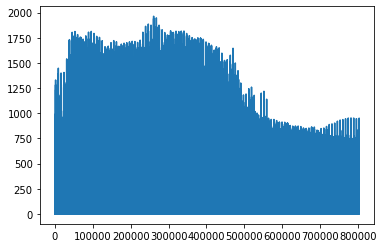

In [52]:
plt.plot(features.ravel())

## Without weight vgg16 model with zero padding

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import cv2,numpy as np
import os

In [5]:
def VGG_16(weights_path=None):
    model = models.Sequential()
    model.add(layers.ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.Flatten())

    #top layer of the VGG net
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model
    
    

In [6]:

im = cv2.resize(cv2.imread('2021-01-12.jpeg'), (224, 224)).astype(np.float32)
#im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)




In [7]:
# Test pretrained model
path_file = os.path.join(os.path.expanduser("~"), '.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
model = VGG_16(path_file)
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_10 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_11 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_12 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 112, 112, 128)    

In [8]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')
out = model.predict(im)
print(np.argmax(out))
  

820
